In [1]:
from hamilton_ice.pipeline import get_func_args, object_io_nodes, build_pipeline
from hamilton_ice.io.artifact import artifact
from hamilton_ice.io.jsonl import jsonl_source, jsonl
from hamilton_ice.util.graphviz import dag_plot

class Example:
    @artifact
    def foo(bar, baz):
        return {"bar": bar["bar"], "baz": baz["baz"]}

    @artifact
    def bar():
        return {"bar": 1}

    @artifact
    def baz():
        return {"baz": 2}

    @staticmethod
    def bing():
        pass

    @jsonl_source
    def dummy_source():
        pass

    @jsonl
    def dummy_io():
        pass

    
build_pipeline(Example)

In [2]:
next(Example.foo.generator())

{'bar': 1, 'baz': 2}

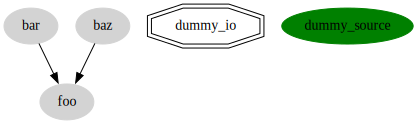

In [3]:
dag_plot(Example)